In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'darkorange'
nsc_color = 'dodgerblue'
eco_color = 'dimgrey'

In [4]:
df = pd.read_csv("Data/OSA_data/1IncidenceCost.csv")
df.head()

,IncidenceEOS,Cost,Categorical Risk Assessment,NSC,Enhanced Clinical Observation,QALY,Categorical Risk Assessment.1,NSC.1,Enhanced Clinical Observation.1,LY,Categorical Risk Assessment.2,NSC.2,Enhanced Clinical Observation.2,ICER ($/QALY),Categorical Risk Assessment.3,NSC.3,Enhanced Clinical Observation.3
0,0.10,NaN,205850.998224,205539.544797,205561.606297,NaN,29.080804,29.081717,29.082398,NaN,0.999996,0.999996,0.999996,NaN,Strongly Dominated (Baseline),Cost Saving,32388.306108
1,0.49,NaN,206029.007271,205717.553844,205739.615344,NaN,29.080277,29.081190,29.081871,NaN,0.999981,0.999981,0.999981,NaN,Strongly Dominated (Baseline),Cost Saving,32388.306108
2,0.88,NaN,206207.016318,205895.562891,205917.624390,NaN,29.079751,29.080663,29.081345,NaN,0.999966,0.999966,0.999966,NaN,Strongly Dominated (Baseline),Cost Saving,32388.306108
3,1.27,NaN,206385.025365,206073.571938,206095.633437,NaN,29.079224,29.080137,29.080818,NaN,0.999951,0.999951,0.999951,NaN,Strongly Dominated (Baseline),Cost Saving,32388.306108
4,1.66,NaN,206563.034412,206251.580985,206273.642484,NaN,29.078697,29.079610,29.080291,NaN,0.999936,0.999936,0.999936,NaN,Strongly Dominated (Baseline),Cost Saving,32388.306108


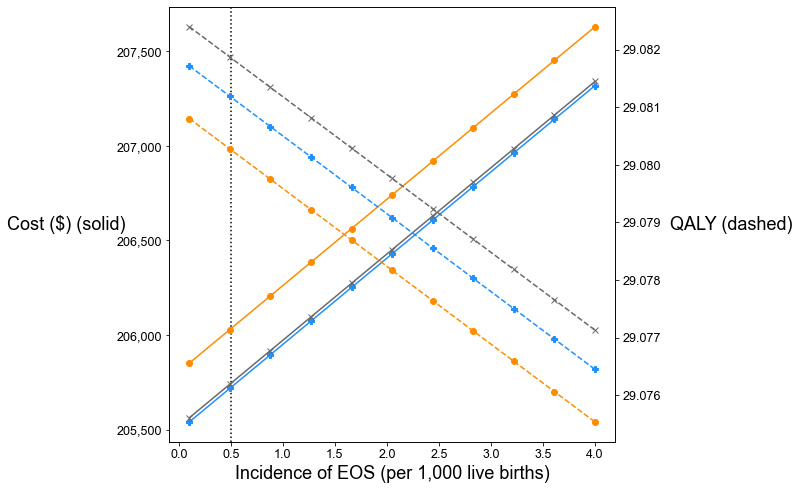

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plt.axvline(x=0.5, color='black', linestyle='dotted', label='_Base Case Incidence')
    
ax2 = ax.twinx()
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(df["IncidenceEOS"], df["Categorical Risk Assessment"], color=cra_color, marker='o', label="_CRA")
ax.plot(df["IncidenceEOS"], df["NSC"], color=nsc_color, marker='P', label="_NSC")
ax.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation"], color=eco_color, marker='x', label="_ECO")
ax.set_xlabel("Incidence of EOS (per 1,000 live births)")
ax.set_ylabel("Cost ($) (solid)", rotation=0, labelpad=50, va="center")
ax2.plot(df["IncidenceEOS"], df["Categorical Risk Assessment.1"], color=cra_color, marker='o', linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["NSC.1"], color=nsc_color, marker='P', linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation.1"], color=eco_color, marker='x', linestyle='dashed')
ax2.set_ylabel("QALY (dashed)", rotation=0, labelpad=70, va="center")
#ax2.set_ylim(bottom=30.88, top=30.92)
#ax.legend()
plt.show()